In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
import types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
client_df36ec52cc714b44bfae6c60d711c038 = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='s5R8OWBXdEjb2FtwifA0xUaejPAefGQFIn2OD3noPnuJ',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3.eu-geo.objectstorage.service.networklayer.com')

body = client_df36ec52cc714b44bfae6c60d711c038.get_object(Bucket='buildthon-donotdelete-pr-6eycorih6lnzcg',Key='T1.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

dataset = pd.read_csv(body)
dataset.head()

,Date/Time,LV ActivePower (kW),Wind Speed (m/s),Theoretical_Power_Curve (KWh),Wind Direction (°)
0,01 01 2018 00:00,380.047791,5.311336,416.328908,259.994904
1,01 01 2018 00:10,453.769196,5.672167,519.917511,268.641113
2,01 01 2018 00:20,306.376587,5.216037,390.900016,272.564789
3,01 01 2018 00:30,419.645905,5.659674,516.127569,271.258087
4,01 01 2018 00:40,380.650696,5.577941,491.702972,265.674286


In [3]:
dataset=dataset.set_index(dataset['Date/Time']).drop('Date/Time',axis=1)

In [4]:
dataset.head()

,LV ActivePower (kW),Wind Speed (m/s),Theoretical_Power_Curve (KWh),Wind Direction (°)
Date/Time,,,,
01 01 2018 00:00,380.047791,5.311336,416.328908,259.994904
01 01 2018 00:10,453.769196,5.672167,519.917511,268.641113
01 01 2018 00:20,306.376587,5.216037,390.900016,272.564789
01 01 2018 00:30,419.645905,5.659674,516.127569,271.258087
01 01 2018 00:40,380.650696,5.577941,491.702972,265.674286


In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 50530 entries, 01 01 2018 00:00 to 31 12 2018 23:50
Data columns (total 4 columns):
LV ActivePower (kW)              50530 non-null float64
Wind Speed (m/s)                 50530 non-null float64
Theoretical_Power_Curve (KWh)    50530 non-null float64
Wind Direction (°)               50530 non-null float64
dtypes: float64(4)
memory usage: 1.9+ MB


In [6]:
dataset.describe()

,LV ActivePower (kW),Wind Speed (m/s),Theoretical_Power_Curve (KWh),Wind Direction (°)
count,50530.000000,50530.000000,50530.000000,50530.000000
mean,1307.684332,7.557952,1492.175463,123.687559
std,1312.459242,4.227166,1368.018238,93.443736
min,-2.471405,0.000000,0.000000,0.000000
25%,50.677890,4.201395,161.328167,49.315437
50%,825.838074,7.104594,1063.776283,73.712978
75%,2482.507568,10.300020,2964.972462,201.696720
max,3618.732910,25.206011,3600.000000,359.997589


In [7]:
dataset.isnull().sum()

LV ActivePower (kW)              0
Wind Speed (m/s)                 0
Theoretical_Power_Curve (KWh)    0
Wind Direction (°)               0
dtype: int64

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f484d0dccc0>,
      dtype=object)

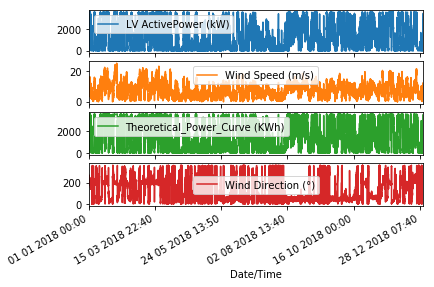

In [8]:
dataset.plot(subplots=True)

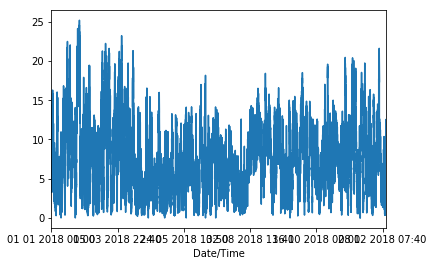

In [9]:
dataset['Wind Speed (m/s)'].plot(kind='line')

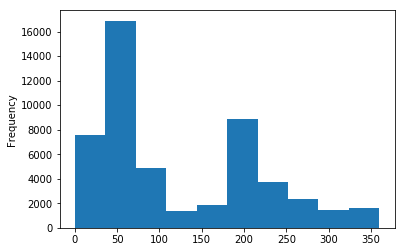

In [10]:
dataset['Wind Direction (°)'].plot(kind='hist')

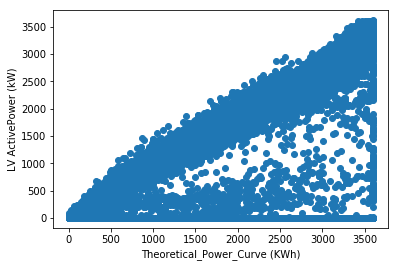

In [11]:
plt.scatter(dataset['Theoretical_Power_Curve (KWh)'],dataset['LV ActivePower (kW)'])
plt.xlabel('Theoretical_Power_Curve (KWh)')
plt.ylabel('LV ActivePower (kW)')
plt.show()

In [12]:
import seaborn as sns

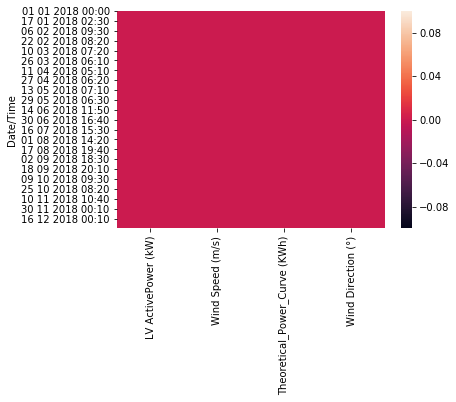

In [13]:
sns.heatmap(dataset.isnull())

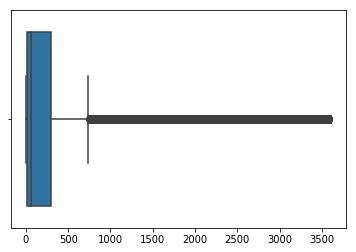

In [14]:
sns.boxplot(dataset.iloc[:,1:])

In [15]:
data_in=dataset.iloc[:,1:]
data_in

,Wind Speed (m/s),Theoretical_Power_Curve (KWh),Wind Direction (°)
Date/Time,,,
01 01 2018 00:00,5.311336,416.328908,259.994904
01 01 2018 00:10,5.672167,519.917511,268.641113
01 01 2018 00:20,5.216037,390.900016,272.564789
01 01 2018 00:30,5.659674,516.127569,271.258087
01 01 2018 00:40,5.577941,491.702972,265.674286
01 01 2018 00:50,5.604052,499.436385,264.578613
01 01 2018 01:00,5.793008,557.372363,266.163605
01 01 2018 01:10,5.306050,414.898179,257.949493
01 01 2018 01:20,5.584629,493.677652,253.480698


In [16]:
data_out=dataset.iloc[:,0]

In [17]:
data_out

Date/Time
01 01 2018 00:00     380.047791
01 01 2018 00:10     453.769196
01 01 2018 00:20     306.376587
01 01 2018 00:30     419.645905
01 01 2018 00:40     380.650696
01 01 2018 00:50     402.391998
01 01 2018 01:00     447.605713
01 01 2018 01:10     387.242188
01 01 2018 01:20     463.651215
01 01 2018 01:30     439.725708
01 01 2018 01:40     498.181702
01 01 2018 01:50     526.816223
01 01 2018 02:00     710.587280
01 01 2018 02:10     655.194275
01 01 2018 02:20     754.762512
01 01 2018 02:30     790.173279
01 01 2018 02:40     742.985291
01 01 2018 02:50     748.229614
01 01 2018 03:00     736.647827
01 01 2018 03:10     787.246216
01 01 2018 03:20     722.864075
01 01 2018 03:30     935.033386
01 01 2018 03:40    1220.609009
01 01 2018 03:50    1053.771973
01 01 2018 04:00    1493.807983
01 01 2018 04:10    1724.488037
01 01 2018 04:20    1636.935059
01 01 2018 04:30    1385.488037
01 01 2018 04:40    1098.932007
01 01 2018 04:50    1021.458008
                       ...    

In [18]:
data_in=np.array(data_in)
data_out=np.array(data_out)

In [19]:
data_in

array([[   5.31133604,  416.32890782,  259.99490356],
       [   5.67216682,  519.91751106,  268.64111328],
       [   5.2160368 ,  390.90001581,  272.56478882],
       ...,
       [   8.43535805, 1788.28475526,   84.74250031],
       [   9.42136574, 2418.38250336,   84.2979126 ],
       [   9.97933197, 2779.18409628,   82.27462006]])

In [20]:
data_out

array([ 380.04779053,  453.76919556,  306.37658691, ..., 2201.10693359,
       2515.6940918 , 2820.46606445])

In [21]:
from sklearn.preprocessing import MinMaxScaler

In [22]:
sc=MinMaxScaler(feature_range=(0,1))

In [23]:
data_in=sc.fit_transform(data_in)

In [24]:
data_in

array([[0.21071704, 0.11564692, 0.7222129 ],
       [0.22503231, 0.14442153, 0.74623031],
       [0.20693623, 0.10858334, 0.75712948],
       ...,
       [0.33465661, 0.49674577, 0.23539741],
       [0.37377457, 0.67177292, 0.23416244],
       [0.3959108 , 0.77199558, 0.22854214]])

In [25]:
from sklearn.model_selection import train_test_split

In [28]:
x_train,x_test,y_train,y_test=train_test_split(data_in,data_out,test_size=0.2)

In [29]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(40424, 3)
(10106, 3)
(40424,)
(10106,)


In [30]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

In [31]:
model=LinearRegression()

In [32]:
model.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [33]:
predictions=model.predict(x_test)

In [34]:
model.score(x_test,y_test)

0.9117439268018639

In [35]:
from ibm_watson_machine_learning import APIClient

In [36]:
wml_credentials={
    "apikey": "UcwmxIfzEJr5hlZ7dPgNftCxzG6X2820RNroBHZakzus",
    "url": "https://eu-gb.ml.cloud.ibm.com",
}

In [37]:
client=APIClient(wml_credentials)

In [38]:
space_id='482c0fc8-6148-4912-b83e-4aff7315f9b9' #from deploy spaces i create MyFirstSpace

In [39]:
client.set.default_space(space_id)

'SUCCESS'

In [40]:
client.software_specifications.list()

-----------------------------  ------------------------------------  ----
NAME                           ASSET_ID                              TYPE
default_py3.6                  0062b8c9-8b7d-44a0-a9b9-46c416adcbd9  base
pytorch-onnx_1.3-py3.7-edt     069ea134-3346-5748-b513-49120e15d288  base
scikit-learn_0.20-py3.6        09c5a1d0-9c1e-4473-a344-eb7b665ff687  base
spark-mllib_3.0-scala_2.12     09f4cff0-90a7-5899-b9ed-1ef348aebdee  base
ai-function_0.1-py3.6          0cdb0f1e-5376-4f4d-92dd-da3b69aa9bda  base
shiny-r3.6                     0e6e79df-875e-4f24-8ae9-62dcc2148306  base
pytorch_1.1-py3.6              10ac12d6-6b30-4ccd-8392-3e922c096a92  base
tensorflow_1.15-py3.6-ddl      111e41b3-de2d-5422-a4d6-bf776828c4b7  base
scikit-learn_0.22-py3.6        154010fa-5b3b-4ac1-82af-4d5ee5abbc85  base
default_r3.6                   1b70aec3-ab34-4b87-8aa0-a4a3c8296a36  base
pytorch-onnx_1.3-py3.6         1bc6029a-cc97-56da-b8e0-39c3880dbbe7  base
tensorflow_2.1-py3.6           1eb25b8

In [41]:
sw_spec_id = client.software_specifications.get_id_by_name('scikit-learn_0.22-py3.6')

In [42]:
meta_props={
    client.repository.ModelMetaNames.NAME:"MyFinalPowerModel",
    client.repository.ModelMetaNames.TYPE: 'scikit-learn_0.22',
    client.repository.ModelMetaNames.SOFTWARE_SPEC_UID: sw_spec_id
}

In [43]:
model_details=client.repository.store_model(model,meta_props=meta_props)

In [44]:
model_uid=client.repository.get_model_uid(model_details)

In [ ]:
meta_props = {
    client.deployments.ConfigurationMetaNames.NAME: "Power Predector",
    client.deployments.ConfigurationMetaNames.DESCRIPTION: "Predict Power",
    client.deployments.ConfigurationMetaNames.ONLINE: {},
    client.deployments.ConfigurationMetaNames.HARDWARE_SPEC: {'name': 'S', 'nodes': 1}
}

deployment_details = client.deployments.create(model_uid, meta_props=meta_props)

deployment_uid = client.deployments.get_uid(deployment_details)

print( deployment_uid )

In [51]:
client.deployments.list()

------------------------------------  ---------------  -----  ------------------------
GUID                                  NAME             STATE  CREATED
5db68a47-65be-49df-87c4-a341b32504fe  Power Predector  ready  2020-10-16T06:07:58.024Z
a0e3d537-1f28-4b2d-a1dd-3375c702ac1e  Brest Cancer     ready  2020-10-15T12:41:46.185Z
43045315-196a-4178-88bb-19d33447d464  Employeee        ready  2020-10-10T06:13:44.142Z
57d9c6c8-14ae-4b46-bbca-33e562654eb0  Brest Cancer     ready  2020-10-05T14:23:06.589Z
9db01e5e-fc9a-45a6-b61d-6d8acd28e1f8  finaldeployment  ready  2020-10-05T13:56:57.802Z
------------------------------------  ---------------  -----  ------------------------
